# Introduction to Programming for Artificial Intelligence & Data Science 
## Assignment 771768
### Name: IFEANYI ANTHONY OKPALA
### Student Number: 202203449
### Project: Customer Data Pre-processing 

# Tasks 
 In this project we have two main task
* Data Processing 
* Data Visualisation 

We will first start with the data processing task but it is necessary to ensure all packages required for this project are installed.

We can just do `pip install pandas` and `pip install seaborn`


# Data Processing Task
Data Processing:
Using standard python (No pandas / seaborn) with default libraries (os, sys, time, json, csv,
…) you have been given the following tasks: 

Note: before we begin with the task, let's import required libraries for this project.

In [1]:
# Importing libraries needed for this assessment project.

import csv
import json
import pandas as pd
import seaborn as sns

%matplotlib inline

### Data Processing Task 1
Read in the provided ACW Data using the CSV library. 

In [2]:
# Let's read our csv file named "acw_user_data.csv" from its directory by making use of a context manager

with open("acw_user_data.csv", mode = 'r') as csv_read:
    
    csv_reader = csv.reader( csv_read, delimiter = ',')
    
    # Let's append the body of our csv file into an empty list called 'body' so we don't have to read this file constantly.
    
    body = []
    
    for row_no, row in enumerate(csv_reader):
        if row_no == 0:
            header = row    # since the header is a single row, it is not necessary to append to an empty list.
        else:          
            body.append(row)
        
print(header,"\n")      # <--------------- let's show the header list information
print(body[0])          # <--------------- let's show the first customer details in our body list by calling index[0]

['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (miles)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)', 'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type'] 

['70 Lydia isle', 'Lake Conor', 'S71 7XZ', '89', '0', 'N/A', '08/18', '11/27', '676373692463', '875', '3', 'Kieran', 'GB62PQKB71416034141571', 'Wilson', 'married or civil partner', '7257', 'True', '72838', 'Male', 'Hyundai', 'Bonneville', '2009', 'Pickup']


### Data Processing Task 2
As a CSV file is an entirely flat file structure, we need to convert our data back into its
rich structure. 

Convert all flat structures into nested structures. These are notably:

* Vehicle - consists of make, model, year, and type

* Credit Card - consists of start date, end date, number, security code, and
IBAN.

* Address - consists of the main address, city, and postcode.

For this task, it may be worthwhile inspecting the CSV headers to see which data
columns may correspond to these above.

Note: Ensure that the values read in are appropriately cast to their respective types.

In [3]:
# For this task, let's first declare variable names for type-conversion, nested structure and reordered attributes


# Type-conversion attributes

int_values = ['Age (Years)','Dependants','Yearly Pension (GBP)','Yearly Salary (GBP)','Credit Card Number','Credit Card CVV']
float_value = ['Distance Commuted to Work (miles)']
bool_value = ['Retired']


# Nested structure attributes

vehicle = ['Vehicle Make','Vehicle Model','Vehicle Year','Vehicle Type']
credit_card = ['Credit Card Start Date','Credit Card Expiry Date', 'Credit Card Number','Credit Card CVV','Bank IBAN']
address = ['Address Street','Address City','Address Postcode']

# Reordered attributes

reorder = ['First Name','Last Name','Age (Years)','Sex','Retired','Marital Status','Dependants','Yearly Salary (GBP)','Yearly Pension (GBP)','Employer Company','Distance Commuted to Work (miles)']    
 

In [4]:
# Let's create a function that converts a single customer data of a flat structure into nested structures.


# We will first create a function to convert values to their respective types.

def type_converter(name, value, index, nest):
    
    """
    
    This function called 'type_converter' 
    is used to convert/cast a given 
    value to their respective type. 
    
    This function takes in four arguments:
    a) 'name' (i.e the header of it's caller function - a single list of length n)
    b) 'value' (i.e the body[i] of it's caller function - a single list of length n)
    c) 'index' (i.e the loop index 'i' of it's caller function structure())
    d) 'nest'  (i.e the structured dictionary of it's caller function structure())
    
    """
    
    if name[index] in int_values:
        
        if value[index] == "":
            nest[name[index]] = value[index]
        else:    
            nest[name[index]] = int(value[index]) 
            
    elif name[index] in float_value:
                
        if value[index] == "":
            nest[name[index]] = value[index]
        else:    
            nest[name[index]] = float(value[index])

    elif name[index] in bool_value:
        
        if value[index] == "True":    
             nest[name[index]] = True
        elif value[index] == "False":
             nest[name[index]] = False
        else:
            nest[name[index]] = value[index]
                    
    else:
        nest[name[index]] = value[index]     
        
    
# Now let's create a function that converts flat structures into nested structures for a single row.  
    
def structure(name, value):
    
    """
    This function called 'structure'
    is used to convert all flat structures
    into nested structure.
    
    This function is also able to call
    an existing function named 'type_converter'
    to ensure the correct value types are used. 
    
    This function takes in two arguments:
    a) 'name' (i.e the header - a single list of length n)
    b) 'value' (i.e the body[i] - a single list of length n)
    
    """
    
    nested_dict = {}
    nest_v = {}
    nest_c = {}
    nest_a = {} 
    
    try:
        
        if len(name) == len(value):

            for i in range(len(name)):

                if name[i] in vehicle: 
                    type_converter(name, value, i, nest_v)

                elif name[i] in credit_card:
                    type_converter(name, value, i, nest_c)

                elif name[i] in address:
                    type_converter(name, value, i, nest_a)

                else:
                    type_converter(name, value, i, nested_dict)
        else:
            raise ValueError(f"Length of {name} and {value} must be the same. Reconfirm below:\n{len(name)},{len(value)}")
    
        if len(nested_dict) == len(reorder):
            
            reordered_dict = {j: nested_dict[j] for j in reorder}  # This comprehension dict was used to reorder existing dict.

            reordered_dict['Vehicle'] = nest_v
            reordered_dict['Credit Card'] = nest_c  
            reordered_dict['Address'] = nest_a
        
            return reordered_dict
        
        else:
            raise Exception(f"Incomplete 'reorder' value.\nThe expected count is {len(nested_dict)}, confirm below:\n{reorder}")
    
    except Exception as err:
        return err

# Let's use a comprehension list to iterate for all rows in the csv data. 

csv_data =[structure(header,body[i]) for i in range(len(body))]   

# Let's print out a single row from the structured csv data to confirm our result.

print(csv_data[0])

{'First Name': 'Kieran', 'Last Name': 'Wilson', 'Age (Years)': 89, 'Sex': 'Male', 'Retired': True, 'Marital Status': 'married or civil partner', 'Dependants': 3, 'Yearly Salary (GBP)': 72838, 'Yearly Pension (GBP)': 7257, 'Employer Company': 'N/A', 'Distance Commuted to Work (miles)': 0.0, 'Vehicle': {'Vehicle Make': 'Hyundai', 'Vehicle Model': 'Bonneville', 'Vehicle Year': '2009', 'Vehicle Type': 'Pickup'}, 'Credit Card': {'Credit Card Start Date': '08/18', 'Credit Card Expiry Date': '11/27', 'Credit Card Number': 676373692463, 'Credit Card CVV': 875, 'Bank IBAN': 'GB62PQKB71416034141571'}, 'Address': {'Address Street': '70 Lydia isle', 'Address City': 'Lake Conor', 'Address Postcode': 'S71 7XZ'}}


### Data Processing Task 3
The client informs you that they have had difficulty with errors in the dependants
column.

Some entries are empty (i.e. “ “ or “”), which may hinder your conversion
from Task 2. 

These should be changed into something meaningful when
encountered.

Print a list where all such error corrections take place.

E.g. Problematic rows for dependants: [16, 58, 80, 98]

In [5]:
# Let's create a function that detects empty rows and replace them with a value.

def value_filler(key_str,value):
    
    """
    This function takes in two arguments:
    1. A key(type str) with the empty rows 
    2. A value to replace the empty rows.
    
    The comprehension list 'empty_rows' 
    within the function will find empty 
    rows in the global scope csv data 
    with the help of the first argument
    'key_str'
    
    A for loop then fills in the second
    agrument into the empty row.
    

    """
    
    empty_rows =[i+1 for i,j in enumerate(csv_data) if csv_data[i][key_str] == "" ] # +1 was introduce to start count at 1 not 0
    
    for i in range(len(csv_data)):

            if csv_data[i][key_str] == "":

                csv_data[i][key_str] = value

            else:
                csv_data[i][key_str]
                
                
    # Let's call on the initial empty rows now named 'filled_value' to ensure they are filled with expected values.
    
    filled_value = [csv_data[i-1][key_str] for i in empty_rows]   # -1 was introduce in reverse the initial count start
    
    return print(f"Problematic row numbers for the {key_str} are:\n{empty_rows}.\n\nEmpty rows were replaced with: {value}")
    

# The mean of key 'Dependants' is a meaningful value to replace empty rows in this situation.

# Let's derive our mean by filtering the 'Dependants' rows with values as shown below. 

rows_with_val = [(csv_data[i]['Dependants']) for i,j in enumerate(csv_data) if csv_data[i]['Dependants'] != "" ]

mean_ = int(sum(rows_with_val)/len(rows_with_val)) # It's ideal for the mean to be of type 'int' for this purpose.


value_filler('Dependants',mean_)     # Replacing empty rows in 'Dependants' with its mean value.

Problematic row numbers for the Dependants are:
[22, 110, 180, 206, 271, 273, 275, 359, 461, 469, 580, 637, 680, 726, 823, 866, 918, 932, 984].

Empty rows were replaced with: 2


### Data Processing Task 4
Write all records to a processed.json file in the JSON data format. 

This should be a list of dictionaries, where each index of the list is a dictionary representing a singular
person. 

In [6]:
# Let's use a context manager to write our processed data into a json file named "processed.json".

with open("processed.json" , mode= 'w') as asw:
    
    json.dump(csv_data, asw)
    

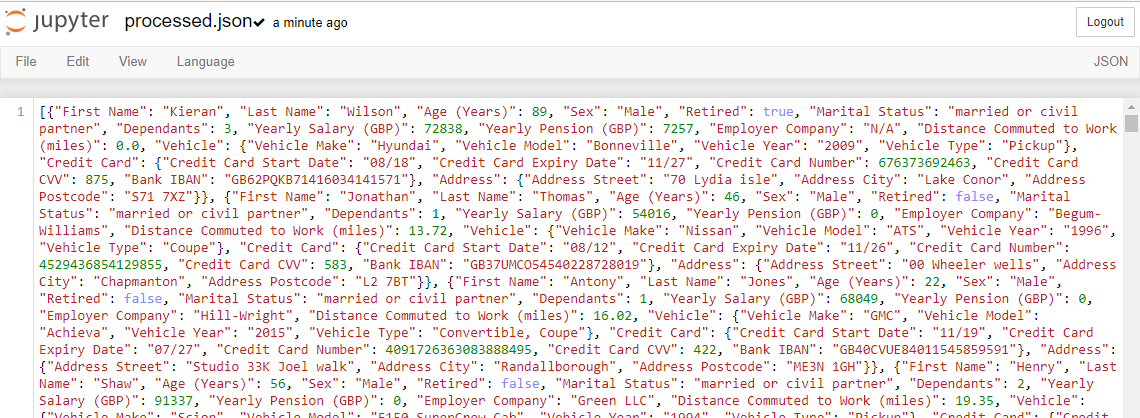

### Data Processing Task 5
You should create two additional file outputs, retired.json and employed.json,

these should contain all retired customers (as indicated by the retired field in the
CSV), 

and all employed customers respectively (as indicated by the employer field in
the CSV) and be in the JSON data format

In [7]:
# Two empty lists are created to append the values for the retired and employed customers while iterating through the data.

retired_ = []             
employed_ = []
 
for i in range((len(csv_data))):
    
    if csv_data[i]['Retired'] == True:
        retired_.append(csv_data[i])
        
    elif csv_data[i]['Employer Company'] != 'N/A':
        employed_.append(csv_data[i])
        
        
print(f"Retired customers:{len(retired_)}.\nEmployed customers:{len(employed_)}.\nTotal no.:{len(retired_)+len(employed_)}")


# Let's write both appended results to a json file named "retired.json" and "employed.json" respectively using context manager.

with open("retired.json" , mode= 'w') as rtd:
    
    json.dump(retired_, rtd)
    
    
with open("employed.json" , mode= 'w') as emd:
    
    json.dump(employed_, emd)  
    

Retired customers:246.
Employed customers:754.
Total no.:1000


### Data Processing Task 6
The client states that there may be some issues with credit card entries.

Any customers that have more than 10 years between their start and end date need
writing to a separate file, called remove_ccard.json, in the JSON data format. The client will manually deal with these later based on your output. 

They request that you write a function to help perform this, which accepts a single row from the CSV data,
and outputs whether the row should be flagged. This can then be used when
determining whether to write the current person to the remove_ccard file. 

In [8]:
def cc_above10(customer_data):
    
    """
    This function takes in a single argument:
    a) a single row from the csv data. 
    
    This function consist of the client condition
    which is any customer that have more than 
    10 years between their start and end date needs
    to be returned and written to a separate file.
    
    A comprehension list will later be used to 
    get the complete 'remove_ccard' data 
    from all customer in the data set.
       
    """
    
    # Let's fetch out the start date and end date from our customer data.
    
    start_card = customer_data['Credit Card']['Credit Card Start Date']
    expiry_card = customer_data['Credit Card']['Credit Card Expiry Date']
    
    
    # Let's retrieve the usesful data and get the integer values for both the months and years.
    
    start_breakdown = start_card.split('/')
    
    start_mm = int(start_breakdown[0])
    start_yy = int(start_breakdown[1])

    expiry_breakdown = expiry_card.split('/')
    
    expiry_mm = int(expiry_breakdown[0])
    expiry_yy = int(expiry_breakdown[1])

    mm = expiry_mm - start_mm
    yy = expiry_yy - start_yy 
    
    # Let's write a conditional statement algorithm to achieve the client desire and return expected value. 
    
    if mm < 0:
        
        mm, yy = mm+12, yy-1
        
    if mm > 0 and yy >= 10:
        
        return customer_data

    elif mm == 0 and yy > 10:
        
        return customer_data
    
    
# Let's use a comprehension list to get the total affected customers by iterate the function output for all the data.

remove_ccard = [cc_above10(csv_data[i]) for i in range(len(csv_data)) if cc_above10(csv_data[i]) != None]  


# Let's write the output data 'remove_ccard' to a separate json file called 'remove_ccard.json' 

with open("remove_ccard.json" , mode= 'w') as rcc:
    
    json.dump(remove_ccard, rcc)
    
print(f"The length of the 'remove_ccard' data is: {len(remove_ccard)}" )

The length of the 'remove_ccard' data is: 252


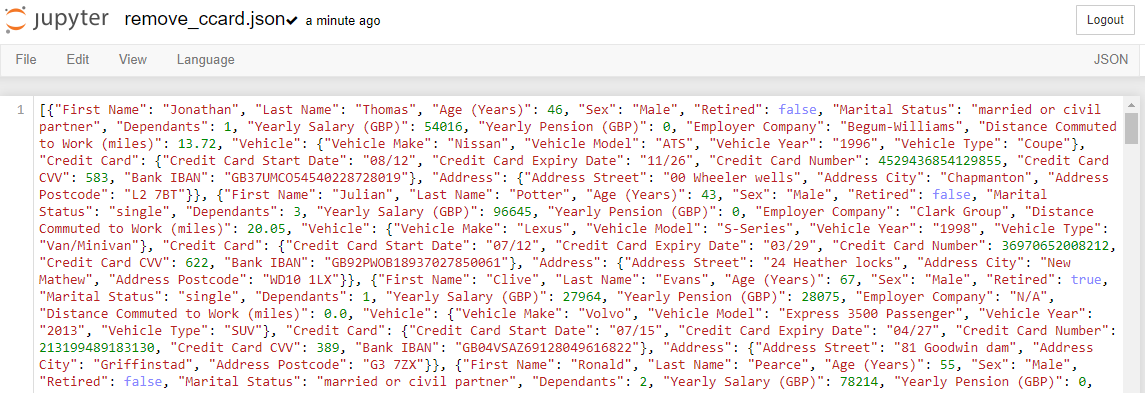

In [9]:
# Let's create a function for the client that genarates a single row by accepting a single card number input from the CSV data. 

def card_fetcher(card_number, data_):
    
    """
    This function confirms whether a given card number
    should be FLAGGED or not by inheriting the existing 
    function 'cc_above10()' and returning an output based
    on the same inherited function.
    
    We will first of all loop through 'data_'
    to confirm if card number is in 'data_' 
    before calling the function 'cc_above10()'
    
    This function takes in two arguments:
    card_number and data_
    
    
    """
    
    # Let's first generate a list of all the card numbers in our data called total_card_no_
    
    total_card_no_ = [data_[i]['Credit Card']['Credit Card Number'] for i in range(len(data_))]
    
    for i in range(len(data_)):
            
        if card_number in total_card_no_:
            
            if data_[i]['Credit Card']['Credit Card Number'] == card_number:
                
                if cc_above10(data_[i]) == None:
                
                    print(f"\nThe customer with card no. '{card_number}' does not have over 10 years credit-card span.")
            
                else:
                    print(f"\nThe customer with card no. '{card_number}' has over 10 years credit-card span.\n\nFLAGGED!!!\n")

                    count = 3
                
                    while count > 0:
                        
                        count -= 1
                        
                        write_ = input("Do you want to write this customer to remove_ccard.json, Y/N: ")
                        
                        if write_.upper() == 'Y' or write_.upper() == 'YES':
                            
                            with open("remove_ccard.json" , mode= 'r') as rcc:
                                
                                rcc_list = list(json.load(rcc))
                                
                                if data_[i] in rcc_list:
                                    
                                    print("\nThis customer already exist in remove_ccard.json")
                                    
                                    break
                                    
                                else:
                                    rcc_list.append(data_[i])
                                    
                                    with open("remove_ccard.json" , mode= 'w') as rcc:
                                        
                                        json.dump(rcc_list, rcc)
                                        
                                    print("\nSuccessful!")
                                    
                                    break    
                            
                        elif write_.upper() == 'N' or write_.upper() == 'NO':# or count == 0: 
                            
                            break
                            
                        elif count == 0:
                            
                            print(f'Invalid input!')
                            
                            break
                            
                        else:
                            print(f'Invalid input!, number of trials left is {count}\n')   
                            
        else:
            raise ValueError("Credit-card number not found!\nPlease kindly reconfirm your input.")
            
            
            
            
# Let's write a function using try and except to detect wrongly inputed credit card number.

def flagged_card_checker():
    
    """
    This function has no argument
    but calls the card_fetcher() 
    function and detects wrongly 
    inputed credit card number by
    making use of try and except.
    
    """
    
    try:   
        card_fetcher(int(input("Fill in credit card number: ")), csv_data)   # Input requires the card number and the csv_data

    except ValueError as vr:

        print(f"\n{vr}")

    finally:

        print("\nTask Completed")
        
        
flagged_card_checker()

Fill in credit card number: 213199489183130

The customer with card no. '213199489183130' has over 10 years credit-card span.

FLAGGED!!!

Do you want to write this customer to remove_ccard.json, Y/N: x
Invalid input!, number of trials left is 2

Do you want to write this customer to remove_ccard.json, Y/N: o
Invalid input!, number of trials left is 1

Do you want to write this customer to remove_ccard.json, Y/N: y

This customer already exist in remove_ccard.json

Task Completed


### Data Processing Task 7
You have been tasked with calculating some additional metrics which will be used for
ranking customers.

You should create a new data attribute for our customers called
“Salary-Commute”.

Reading in from processed.json:

a. Add, and calculate appropriately, this new attribute. It should represent the
Salary that a customer earns, per mile of their commute.

* Note: If a person travels 1 or fewer commute miles, then their salarycommute would be just their salary.

b. Sort these records by that new metric, in ascending order.

c. Store the output file out as a JSON format, for a commute.json file.

In [10]:
# Let's read the 'processed.json' which was earlier created and then iterate through its value to determine the 'Salary-Commute'.

with open('processed.json', mode='r') as prd:
    
    processed = json.load(prd)

for i in processed:
        
    if i['Distance Commuted to Work (miles)'] <=1:
        i['Salary-Commute'] = i['Yearly Salary (GBP)']
    else:
        i['Salary-Commute'] = int(i['Yearly Salary (GBP)'] / i['Distance Commuted to Work (miles)'])
        
# We will make use of the sort method and a lambda function to sort our data using key name 'Salary-Commute' 

processed.sort(key=lambda name: name['Salary-Commute'], reverse=False) # reverse at False(default) will sort in ascending order.

# Let's reconfirm the sort

print(f"Salary-Commute for the first customer is : {processed[0]['Salary-Commute']}")  
print(f"Salary-Commute for the last customer is: {processed[999]['Salary-Commute']}")

Salary-Commute for the first customer is : 3088
Salary-Commute for the last customer is: 98596


In [11]:
# Let's use a context manager to write our updated data into a json file named 'commute.json'

with open('commute.json', mode= 'w') as cmt:
    
    json.dump(processed, cmt)

# Data Visualisation Task
Using Pandas and Seaborn

Your client wishes to understand the data they have on their customers a bit more by use of
visualisations.

With use of Pandas and Seaborn read in the original CSV file provided with
the assignment.

In [12]:
# In this task on data visalization, we will first read the original CSV file provided and assign to a variable name 'acw_df'

acw_df = pd.read_csv("./acw_user_data.csv")
acw_df

,Address Street,Address City,Address Postcode,Age (Years),Distance Commuted to Work (miles),Employer Company,Credit Card Start Date,Credit Card Expiry Date,Credit Card Number,Credit Card CVV,...,Last Name,Marital Status,Yearly Pension (GBP),Retired,Yearly Salary (GBP),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
0,70 Lydia isle,Lake Conor,S71 7XZ,89,0.00,NaN,08/18,11/27,676373692463,875,...,Wilson,married or civil partner,7257,True,72838,Male,Hyundai,Bonneville,2009,Pickup
1,00 Wheeler wells,Chapmanton,L2 7BT,46,13.72,Begum-Williams,08/12,11/26,4529436854129855,583,...,Thomas,married or civil partner,0,False,54016,Male,Nissan,ATS,1996,Coupe
2,Studio 33K Joel walk,Randallborough,ME3N 1GH,22,16.02,Hill-Wright,11/19,07/27,4091726363083888495,422,...,Jones,married or civil partner,0,False,68049,Male,GMC,Achieva,2015,"Convertible, Coupe"
3,Studio 46S Bethany lights,East Reece,E10 9RJ,56,19.35,Green LLC,10/17,04/18,4671332769487632633,669,...,Shaw,married or civil partner,0,False,91337,Male,Scion,F150 SuperCrew Cab,1994,Pickup
4,Flat 3 Christine views,Fletcherstad,WS2 9SN,57,5.94,"Hill, Evans and Harrison",04/19,11/27,2245094149128526,659,...,O'Brien,married or civil partner,0,False,18446,Female,Buick,Outback,2020,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Studio 6 Heather prairie,North Amelia,E9 0HB,48,18.44,Phillips-Pope,04/19,08/26,3563802099155576,908,...,Clark,married or civil partner,0,False,84645,Male,Saturn,Convertible,2015,Van/Minivan
996,Flat 3 Davies run,Greenshire,E7 4UJ,22,19.61,Hughes LLC,05/12,07/28,3591311819315276,675,...,Jones,married or civil partner,0,False,93314,Female,Toyota,Yukon,2015,Van/Minivan
997,Flat 7 Barber motorway,Burrowsshire,L62 8TA,38,6.66,Bailey Group,01/13,05/29,3584931475767707,679,...,Walker,single,0,False,20940,Female,Ford,S6,2020,Sedan
998,00 Tony forks,Abbiebury,NP4 1JL,45,18.13,Foster-Price,04/19,05/23,4090311300716168,775,...,Thomson,married or civil partner,0,False,82412,Male,Scion,Ram 1500 Quad Cab,2015,Pickup


### Data Visualisation Task 1
Obtain the Data Series for Salary, and Age, and calculate the following:
* a. Mean Salary
* b. Median Age

In [13]:
# Data Series for 'Salary', and 'Age'

salary_df = acw_df['Yearly Salary (GBP)']
age_df = acw_df['Age (Years)']


# Let's confirm the type of the date for both Salary and Age

print(type(salary_df))     
print(type(age_df))        

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [14]:
# Let's find the mean and median for the 'Salary' and 'Age' column respectively.

mean_salary = salary_df.mean()
median_age = age_df.median()

print(f"The mean of the salaries is: {mean_salary:0.2f}")
print(f"The median of the ages is: {median_age:0.2f}")

The mean of the salaries is: 57814.08
The median of the ages is: 54.00


### Data Visualisation Task 2
Perform univariate plots of the following data attributes:
* a. Age, calculating how many bins would be required for a bin_width of 5.
* b. Dependents, fixing data errors with seaborn itself.
* c. Age (of default bins), conditioned on Marital Status

For this data, the number of bin at a binwidth of 5 is: 15.


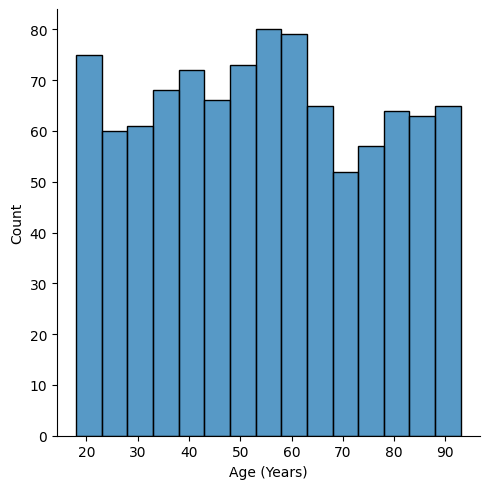

In [15]:
# Task 2a

# Data series for 'Age' is already been assigned a variable name 'age_df'

# Let's calculate how many bins required for a bin_width of 5.

bin_width = 5

calc_bin = round((age_df.max() - age_df.min()) / bin_width)  # <---- Let's round our calculation to the nearest integer value.

# Performing a univariate plot for Age with variable name displot_A.

displot_A = sns.displot(age_df, binwidth=5)

print(f"For this data, the number of bin at a binwidth of 5 is: {calc_bin}.")

Unique categorical data in 'Dependants' before fixing with seaborn:  [ 3.  1.  2.  4. nan  5.] 

Unique categorical data in 'Dependants' after fixing with seaborn:  [3. 1. 2. 4. 5.] 



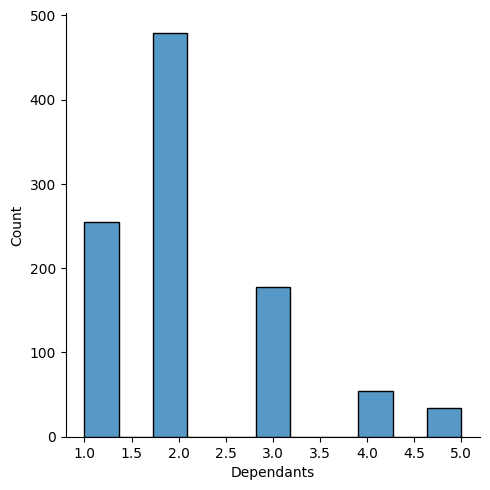

In [16]:
# Task 2b

# Let's print each unique categorical data in 'Dependants' to confirm the error.

print("Unique categorical data in 'Dependants' before fixing with seaborn: ", acw_df['Dependants'].unique(),"\n") 


# Fixing data errors with seaborn itself.

# Let's fillna with the mode value and input the 'Dependents' series data into the displot function name displot_D.

acw_df['Dependants'].fillna(value = acw_df['Dependants'].mode()[0], inplace = True)

displot_D = sns.displot(acw_df['Dependants'])


# Let's print each unique categorical data in 'Dependants' to re-confirm that the errors were fixed using seaborn.

print("Unique categorical data in 'Dependants' after fixing with seaborn: ", acw_df['Dependants'].unique(),"\n")

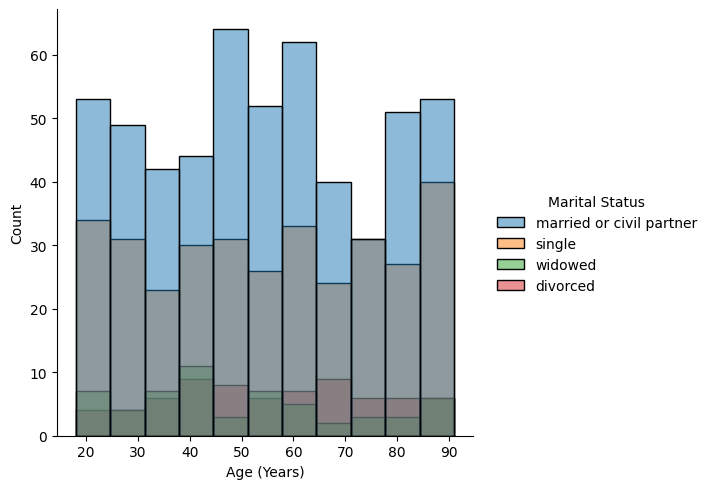

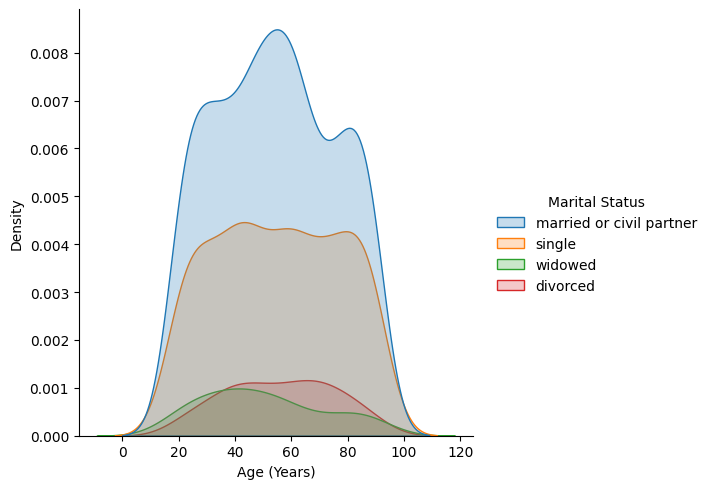

In [17]:
# Task 2c

# Performing univariate plots for 'Age' (default bins) conditioned on 'Marital status' with variable name displot_AM

displot_AM = sns.displot(data= acw_df, x ='Age (Years)', hue = 'Marital Status')

# From the above displot output, it's noticeable that the plot failed to display all hue categorical value due to their counts.

# Let's include the kind value 'kde' and fill the category for a better visualization.

displot_AM_2 = sns.displot(data= acw_df, x ='Age (Years)', hue = 'Marital Status', kind = "kde", fill = True)

# Now we have a clearer visualization

### Data Visualisation Task 3
Perform multivariate plots with the following data attributes:
* a. Commuted distance against salary.
* b. Age against Salary
* c. Age against Salary conditioned by Dependants 

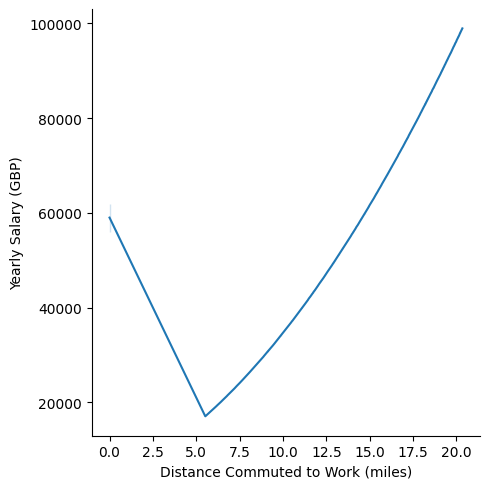

In [18]:
# Task 3a

# 'Commuted distance' against 'Salary' with variable name relplot_CvS. 

# Let's use a relplot and set kind to 'line', this will give us a clean readable plot.

relplot_CvS = sns.relplot(data = acw_df, y = 'Yearly Salary (GBP)', x ='Distance Commuted to Work (miles)', kind= 'line')

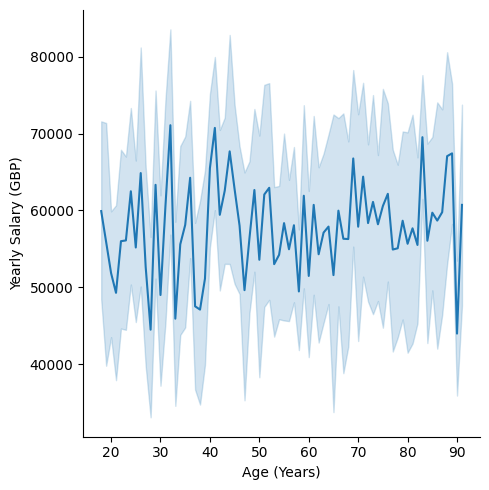

In [19]:
# Task 3b

# 'Age' against 'Salary' with variable name relplot_AvS.

# Let's use a relplot and set kind to 'line', this will give us a clean readable plot.

relplot_AvS = sns.relplot(data = acw_df, x ='Age (Years)', y = 'Yearly Salary (GBP)',kind= 'line')

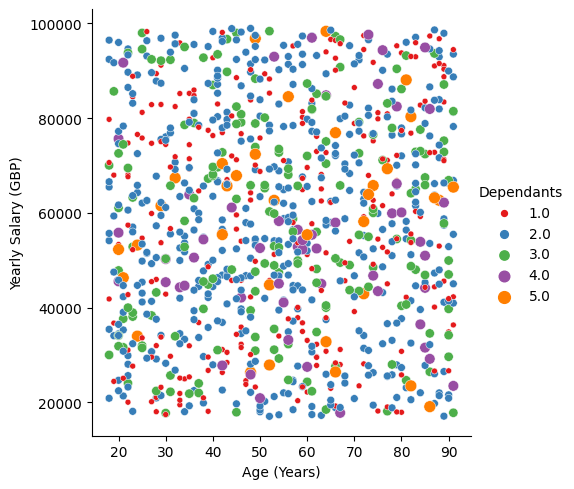

In [20]:
# Task 3c

# 'Age' against 'Salary' conditioned by 'Dependants' with variable name relplot_AvSD.

relplot_AvSD = sns.relplot(
    data = acw_df, x ='Age (Years)',
    y = 'Yearly Salary (GBP)',
    hue ='Dependants',
    size= 'Dependants',
    palette= 'Set1'
)

# The palette was changed from it's default to improve the readability of the plot.

### Data Visualisation Task 4
Your client would like the ability to save the plots which you have produced. 

Provide a Notebook cell which can do this. 

In [21]:
# Let's create a function to enable the client save plots easily.

def save_(plot_, name_):
    
    """
    This function allows the client to save
    individual plots by filling in both the
    plot itself and a given plot name.
    
    This function takes in two arguments:
    plot_ and name_
    
    """ 
    plot_name = f"./{name_}.png"
    
    try:
        return plot_.savefig(plot_name)
    
    except:
        return plot_.get_figure().savefig(plot_name)  # For axes-subplot, using a get_figure() before the savefig() is required
    
    finally:
        return 'saved'

# The function above can now save plots individually, but let's use a comprehension list to save all existing data.

# Input values

plot_to_save = [displot_A, displot_D, displot_AM, displot_AM_2, relplot_CvS, relplot_AvSD, relplot_AvS ]
name_of_plot = ['displot_1', 'displot_2', 'displot_3a', 'displot_3b', 'relplot_1', 'relplot_2', 'relplot_3']

total_save = [save_(plot_to_save[i],name_of_plot[i]) for i in range(len(plot_to_save)) if len(plot_to_save) == len(name_of_plot)]
total_save

['saved', 'saved', 'saved', 'saved', 'saved', 'saved', 'saved']